In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

#### Case1

In [ ]:
##A physician is evaluating a new diet for her patients with a family history of heart disease. To test the effectiveness of 
##this diet, 16 patients are placed on the diet for 6 months. Their weights and triglyceride levels are measured before and
##after the study, and the physician wants to know if either set of measurements has changed.

In [ ]:
## Null Hypothesis(Ho):There is no change in the values of triglyciride and weight.
## Alternate Hypothesis(Ha):There is change in the values of triglyciride and weight.
## Confidence Interval:95%
## Decision Boundary:p<0.05 will be rejected.
## Test:independent t-test(relative)

## Business Conclusion:

##1.## As the p value is HIGH we will ACCEPT the NULL HYPOTHESIS in case of triglyciride levels
##(i.e there is no change in the level of triglyciride).

##2 As the p value is LOW we will REJECT the NULL HYPOTHESIS in case of weights levels
## (i.e there is change in the weight of the patients).

In [135]:
inp_1=pd.read_csv(r'C:\Users\goura\Downloads\Gaurav_data_science\Basic Python Stats Modelling\Assignments\STATS Assignments\7. Basic Stats - Case Study-1\dietstudy.csv')

In [136]:
inp_1.head(16)

,patid,age,gender,tg0,tg1,tg2,tg3,tg4,wgt0,wgt1,wgt2,wgt3,wgt4
0,1,45,Male,180,148,106,113,100,198,196,193,188,192
1,2,56,Male,139,94,119,75,92,237,233,232,228,225
2,3,50,Male,152,185,86,149,118,233,231,229,228,226
3,4,46,Female,112,145,136,149,82,179,181,177,174,172
4,5,64,Male,156,104,157,79,97,219,217,215,213,214
5,6,49,Female,167,138,88,107,171,169,166,165,162,161
6,7,63,Male,138,132,146,143,132,222,219,215,215,210
7,8,63,Female,160,128,150,118,123,167,167,166,162,161
8,9,52,Male,107,120,129,195,174,199,200,196,196,193
9,10,45,Male,156,103,126,135,92,233,229,229,229,226


In [8]:
stats.ttest_rel(inp_1.tg0,inp_1.tg4)

Ttest_relResult(statistic=1.2000008533342437, pvalue=0.24874946576903698)

In [ ]:
## As the p value is HIGH we will ACCEPT the NULL HYPOTHESIS in case of triglyciride levels
## i.e there is no change in the level of triglyciride.

In [138]:
stats.ttest_rel(inp_1.wgt0,inp_1.wgt4)

Ttest_relResult(statistic=11.174521688532522, pvalue=1.137689414996614e-08)

In [ ]:
## As the p value is LOW we will REJECT the NULL HYPOTHESIS in case of weights levels
## i.e there is change in the weight of the patients.

#### CASE2

In [ ]:
##An analyst at a department store wants to evaluate a recent credit card promotion.To this end, 500 cardholders were
##randomly selected. Half received an ad promoting a reduced interest rate on purchases made over the next three months,
##and half received a standard seasonal ad. Is the promotion effective to increase sales?

In [ ]:
## Null Hypothesis(Ho):Promotion was not effective.
## Alternate Hypothesis(Ha):Promotion was effective.
## Confidence Interval:95%
## Decision Boundary:p<0.05 will be rejected.
## Test:independent t-test/ANOVA
## Business Conclusion:we will reject NULL hypothesis as p value is low (0.02) at 95% CI.
##i.e. we will reject the fact that Promotion was not effective,and we are 95% confident.
##But we cannot reject NULL Hypothesis at 99% CI.

In [107]:
inp_2=pd.read_csv(r'C:\Users\goura\Downloads\Compressed\Gaurav_data_science\Basic Python Stats Modelling\Assignments\STATS Assignments\7. Basic Stats - Case Study-1\creditpromo.csv')

In [108]:
inp_2

,id,insert,dollars
0,148,Standard,2232.771979
1,572,New Promotion,1403.807542
2,973,Standard,2327.092181
3,1096,Standard,1280.030541
4,1541,New Promotion,1513.563200
...,...,...,...
495,130163,New Promotion,1513.060134
496,130204,New Promotion,1020.757943
497,130255,Standard,1919.856304
498,130583,Standard,1863.014814


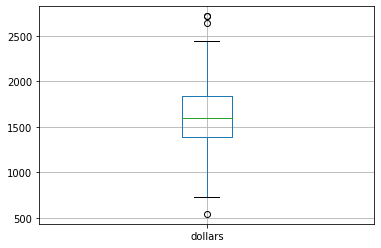

In [109]:
inp_2.boxplot(column='dollars')

In [110]:
inp_2.dollars=inp_2.dollars.clip(lower=inp_2.dollars.quantile(0.01),upper=inp_2.dollars.quantile(0.99))

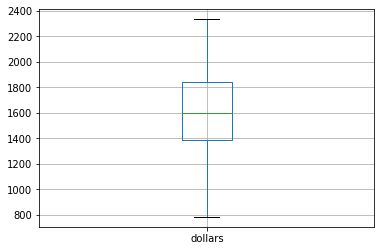

In [111]:
inp_2.boxplot(column='dollars')

In [112]:
inp_2.sort_values('insert',inplace=True)

In [113]:
CC1=inp_2.iloc[0:250,:]

In [114]:
CC2=inp_2.iloc[250:500,:]

In [115]:
CC1.head(2)

,id,insert,dollars
167,44649,New Promotion,1430.574472
192,51000,New Promotion,1320.955426


In [116]:
CC2.head(2)

,id,insert,dollars
357,96308,Standard,1692.657616
355,96063,Standard,1736.851106


In [117]:
CC1.dollars.mean()

1636.0891020198599

In [118]:
CC2.dollars.mean()

1564.5296555700668

In [119]:
## Independent ttest
stats.ttest_ind(CC1.dollars,CC2.dollars)

Ttest_indResult(statistic=2.328207122392348, pvalue=0.020300636902288928)

In [120]:
## ANOVA
stats.f_oneway(CC1.dollars,CC2.dollars)

F_onewayResult(statistic=5.420548404758475, pvalue=0.020300636902289417)

In [121]:
#### we will reject null hypothesis at 95% CI and not with 99% CI
##### we can say that promotion was effective in increasing sales with 95% CI.

#### CASE3

In [ ]:
##An experiment is conducted to study the hybrid seed production of bottle gourd under open field conditions.
##The main aim of the investigation is to compare natural pollination and hand pollination. The data are collected on 
##10 randomly selected plants from each of natural pollination and hand pollination. The data are collected on
##fruit weight (kg), seed yield/plant (g) and seedling length (cm).

##a. Is the overall population of Seed yield/plant (g) equals to 200?
##b. Test whether the natural pollination and hand pollination under open field conditions are equally effective 
##or are significantly different.

In [ ]:
##a. Is the overall population of Seed yield/plant (g) equals to 200?

In [ ]:
## Null Hypothesis(Ho):overall population of Seed yield/plant (g) equals to 200.
## Alternate Hypothesis(Ha):overall population of Seed yield/plant (g) is NOT equals to 200.
## Confidence Interval:95%
## Decision Boundary:p<0.05 will be rejected.
## Test:one sample t-test
## Business Conclusion:we will reject NULL hypothesis as p value is low (0.03) at 95% CI.
## (i.e.)overall population of Seed yield/plant (g) is NOT equals to 200
##But we cannot reject NULL Hypothesis at 99% CI.

In [52]:
inp_3=pd.read_csv(r'C:\Users\goura\Downloads\Compressed\Gaurav_data_science\Basic Python Stats Modelling\Assignments\STATS Assignments\7. Basic Stats - Case Study-1\pollination.csv')

In [53]:
inp_3

,Group,Fruit_Wt,Seed_Yield_Plant,Seedling_length
0,Natural,1.85,147.70,16.86
1,Natural,1.86,136.86,16.77
2,Natural,1.83,149.97,16.35
3,Natural,1.89,172.33,18.26
4,Natural,1.80,144.46,17.90
5,Natural,1.88,138.30,16.95
6,Natural,1.89,150.58,18.15
7,Natural,1.79,140.99,18.86
8,Natural,1.85,140.57,18.39
9,Natural,1.84,138.33,18.58


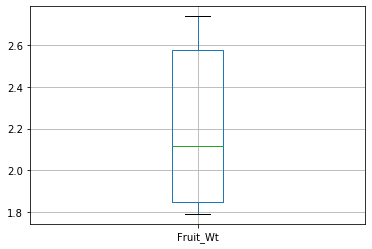

In [100]:
inp_3.boxplot(column=['Fruit_Wt'])

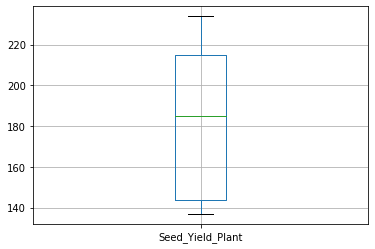

In [101]:
inp_3.boxplot(column=['Seed_Yield_Plant'])

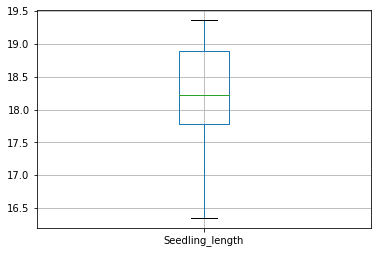

In [102]:
inp_3.boxplot(column=['Seedling_length'])

In [107]:
stats.ttest_1samp(inp_3.Seed_Yield_Plant,popmean=200)

Ttest_1sampResult(statistic=-2.3009121248548645, pvalue=0.032891040921283025)

In [105]:
## we can verify our assumption by checking the mean.

inp_3.Seed_Yield_Plant.mean()

180.8035

In [ ]:
##b. Test whether the natural pollination and hand pollination under open field conditions are equally effective 
##or are significantly different

In [76]:
## Null Hypothesis(Ho):natural pollination and hand pollination under open field conditions are equally effective.
## Alternate Hypothesis(Ha):natural pollination and hand pollination under open field conditions are NOT equally effective.
## Confidence Interval:95%
## Decision Boundary:p<0.05 will be rejected.
## Test:ANOVA/independent ttest
## Business Conclusion:we will reject NULL hypothesis as p value is low at 95% CI.
## (i.e.)natural pollination and hand pollination under open field conditions are NOT equally effective

In [57]:
P1=inp_3.iloc[np.where(inp_3.Group=='Natural')]
P2=inp_3.iloc[np.where(inp_3.Group=='Hand')]

In [60]:
P1.head(2)

,Group,Fruit_Wt,Seed_Yield_Plant,Seedling_length
0,Natural,1.85,147.70,16.86
1,Natural,1.86,136.86,16.77


In [61]:
P2.head(2)

,Group,Fruit_Wt,Seed_Yield_Plant,Seedling_length
10,Hand,2.58,224.26,18.18
11,Hand,2.74,197.50,18.07


In [62]:
stats.f_oneway(P1.Fruit_Wt,P2.Fruit_Wt)

F_onewayResult(statistic=312.228532974426, pvalue=8.078362076486568e-13)

In [63]:
stats.f_oneway(P1.Seed_Yield_Plant,P2.Seed_Yield_Plant)

F_onewayResult(statistic=194.83303662980398, pvalue=4.271481585484407e-11)

In [64]:
stats.f_oneway(P1.Seedling_length,P2.Seedling_length)

F_onewayResult(statistic=6.46293337115627, pvalue=0.020428817064110556)

In [65]:
stats.ttest_ind(P1.Fruit_Wt,P2.Fruit_Wt)

Ttest_indResult(statistic=-17.669989614440286, pvalue=8.078362076486221e-13)

In [66]:
stats.ttest_ind(P1.Seed_Yield_Plant,P2.Seed_Yield_Plant)

Ttest_indResult(statistic=-13.958260515902547, pvalue=4.271481585484385e-11)

In [67]:
stats.ttest_ind(P1.Seedling_length,P2.Seedling_length)

Ttest_indResult(statistic=-2.542229999657055, pvalue=0.020428817064110226)

In [19]:
####pollination is different under different conditions.

##### CASE 4

In [ ]:
##An electronics firm is developing a new DVD player in response to customer requests. Using a prototype, the marketing team
##has collected focus data for different age groups viz. Under 25; 25-34; 35-44; 45-54; 55-64; 65 and above.
##Do you think that consumers of various ages rated the design differently?

In [ ]:
## Null Hypothesis(Ho):consumers of various ages rated the design similarly.
## Alternate Hypothesis(Ha):consumers of various ages rated the design differently.
## Confidence Interval:95%
## Decision Boundary:p<0.05 will be rejected.
## Test:ANOVA
## Business Conclusion:we will reject NULL hypothesis as p value is low at 95% CI.
## (i.e.)Consumer of Different group rated product differently.

In [77]:
inp_4=pd.read_csv(r'C:\Users\goura\Downloads\Compressed\Gaurav_data_science\Basic Python Stats Modelling\Assignments\STATS Assignments\7. Basic Stats - Case Study-1\dvdplayer.csv')

In [78]:
inp_4

,agegroup,dvdscore
0,65 and over,38.454803
1,55-64,17.669677
2,65 and over,31.704307
3,65 and over,25.924460
4,Under 25,30.450007
...,...,...
63,45-54,46.567682
64,65 and over,23.999491
65,Under 25,24.994419
66,65 and over,33.538502


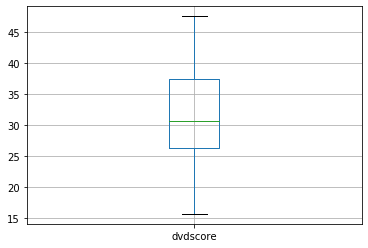

In [96]:
inp_4.boxplot(column='dvdscore')

In [81]:
inp_4.agegroup.unique()

array(['65 and over', '55-64', 'Under 25', '25-34', '45-54', '35-44'],
      dtype=object)

In [82]:
G1=inp_4.iloc[np.where(inp_4.agegroup=='Under 25')]
G2=inp_4.iloc[np.where(inp_4.agegroup=='25-34')]
G3=inp_4.iloc[np.where(inp_4.agegroup=='35-44')]
G4=inp_4.iloc[np.where(inp_4.agegroup=='45-54')]
G5=inp_4.iloc[np.where(inp_4.agegroup=='55-64')]
G6=inp_4.iloc[np.where(inp_4.agegroup=='65 and over')]

In [91]:
stats.f_oneway(G1.dvdscore,G2.dvdscore,G3.dvdscore,G4.dvdscore,G5.dvdscore,G6.dvdscore)

F_onewayResult(statistic=6.992526962676518, pvalue=3.087324905679639e-05)

In [ ]:
## Consumer of Different group rated product differently

#### Case 5

In [7]:
##A survey was conducted among 2800 customers on several demographic characteristics. Working status, sex, age, age-group,
##race, happiness, no. of child, marital status, educational qualifications, income group etc. had been captured for that 
##purpose.
##a. Is there any relationship in between labour force status with marital status?
##b. Do you think educational qualification is somehow controlling the marital status?
##c. Is happiness is driven by earnings or marital status?

In [8]:
inp_5=pd.read_csv(r'C:\Users\goura\Downloads\Gaurav_data_science\Basic Python Stats Modelling\Assignments\STATS Assignments\7. Basic Stats - Case Study-1\sample_survey.csv')

In [9]:
inp_5.head()

,id,wrkstat,marital,childs,age,educ,paeduc,maeduc,speduc,degree,...,agecat,childcat,news1,news2,news3,news4,news5,car1,car2,car3
0,1,Working full time,Divorced,2.0,60.0,12.0,12.0,12.0,NaN,High school,...,55 to 64,1-2,No,No,No,No,No,American,Japanese,Japanese
1,2,Working part-time,Never married,0.0,27.0,17.0,20.0,NaN,NaN,Junior college,...,25 to 34,None,No,No,Yes,No,No,American,German,Japanese
2,3,Working full time,Married,2.0,36.0,12.0,12.0,12.0,16.0,High school,...,35 to 44,1-2,No,No,No,Yes,Yes,American,American,NaN
3,4,Working full time,Never married,0.0,21.0,13.0,NaN,12.0,NaN,High school,...,Less than 25,None,No,No,No,Yes,Yes,American,Other,NaN
4,5,Working full time,Never married,0.0,35.0,16.0,NaN,12.0,NaN,Bachelor,...,35 to 44,None,No,No,No,No,No,American,American,Korean


In [10]:
inp_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 46 columns):
id          2832 non-null int64
wrkstat     2831 non-null object
marital     2831 non-null object
childs      2825 non-null float64
age         2828 non-null float64
educ        2820 non-null float64
paeduc      2041 non-null float64
maeduc      2399 non-null float64
speduc      1311 non-null float64
degree      2822 non-null object
sex         2832 non-null object
race        2832 non-null object
born        2819 non-null object
parborn     2812 non-null object
granborn    2630 non-null float64
income      2503 non-null object
rincome     1849 non-null object
polviews    2691 non-null object
cappun      2599 non-null object
postlife    2066 non-null object
happy       2806 non-null object
hapmar      1337 non-null object
owngun      1869 non-null object
news        1870 non-null object
tvhours     2337 non-null float64
howpaid     1347 non-null object
ethnic      2238 non-null ob

In [47]:
Conti_Vars=inp_5.loc[:,(inp_5.dtypes=='int64')|(inp_5.dtypes=='float64')]
Catog_Vars=inp_5.loc[:,(inp_5.dtypes=='object')]

In [48]:
Conti_Vars

,id,childs,age,educ,paeduc,maeduc,speduc,granborn,tvhours
0,1,2.0,60.0,12.0,12.0,12.0,NaN,0.0,2.0
1,2,0.0,27.0,17.0,20.0,NaN,NaN,0.0,6.0
2,3,2.0,36.0,12.0,12.0,12.0,16.0,0.0,1.0
3,4,0.0,21.0,13.0,NaN,12.0,NaN,1.0,2.0
4,5,0.0,35.0,16.0,NaN,12.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...
2827,2828,2.0,73.0,14.0,8.0,12.0,12.0,3.0,NaN
2828,2829,0.0,40.0,12.0,12.0,12.0,NaN,0.0,1.0
2829,2830,0.0,73.0,6.0,4.0,NaN,10.0,NaN,4.0
2830,2831,0.0,47.0,12.0,12.0,12.0,NaN,0.0,2.0


In [49]:
Conti_Vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 9 columns):
id          2832 non-null int64
childs      2825 non-null float64
age         2828 non-null float64
educ        2820 non-null float64
paeduc      2041 non-null float64
maeduc      2399 non-null float64
speduc      1311 non-null float64
granborn    2630 non-null float64
tvhours     2337 non-null float64
dtypes: float64(8), int64(1)
memory usage: 199.2 KB


In [50]:
## Number of missingin columns 'paeduc','maeduc','speduc','granborn','tvhours' are very high so we will drop the columns.

In [51]:
Conti_Vars=Conti_Vars.drop(columns=['paeduc','maeduc','speduc','granborn','tvhours'])

In [52]:
Conti_Vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 4 columns):
id        2832 non-null int64
childs    2825 non-null float64
age       2828 non-null float64
educ      2820 non-null float64
dtypes: float64(3), int64(1)
memory usage: 88.6 KB


In [53]:
Catog_Vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 37 columns):
wrkstat     2831 non-null object
marital     2831 non-null object
degree      2822 non-null object
sex         2832 non-null object
race        2832 non-null object
born        2819 non-null object
parborn     2812 non-null object
income      2503 non-null object
rincome     1849 non-null object
polviews    2691 non-null object
cappun      2599 non-null object
postlife    2066 non-null object
happy       2806 non-null object
hapmar      1337 non-null object
owngun      1869 non-null object
news        1870 non-null object
howpaid     1347 non-null object
ethnic      2238 non-null object
eth1        2557 non-null object
eth2        1102 non-null object
eth3        444 non-null object
confinan    1864 non-null object
conbus      1821 non-null object
coneduc     1881 non-null object
conpress    1862 non-null object
conmedic    1875 non-null object
contv       1876 non-null object
age

In [54]:
## we will remove the columns which are not useful in analysis

Catog_Vars=Catog_Vars.drop(columns=['race', 'born', 'parborn','polviews', 'cappun', 'postlife','hapmar', 'owngun', 'news', 'howpaid', 'ethnic', 'eth1', 'eth2', 'eth3',
       'confinan', 'conbus', 'coneduc', 'conpress', 'conmedic', 'contv','childcat', 'news1', 'news2', 'news3', 'news4', 'news5',
       'car1', 'car2', 'car3','rincome'])

In [55]:
Catog_Vars

,wrkstat,marital,degree,sex,income,happy,agecat
0,Working full time,Divorced,High school,Male,$25000 or more,Pretty happy,55 to 64
1,Working part-time,Never married,Junior college,Female,$15000 - 19999,Pretty happy,25 to 34
2,Working full time,Married,High school,Male,$25000 or more,Very happy,35 to 44
3,Working full time,Never married,High school,Male,$15000 - 19999,Very happy,Less than 25
4,Working full time,Never married,Bachelor,Female,$25000 or more,Pretty happy,35 to 44
...,...,...,...,...,...,...,...
2827,Working full time,Married,Junior college,Female,$20000 - 24999,Very happy,65 or older
2828,Working full time,Divorced,High school,Female,$15000 - 19999,Not too happy,35 to 44
2829,Retired,Married,LT High school,Male,$20000 - 24999,Pretty happy,65 or older
2830,Working full time,Never married,High school,Male,$25000 or more,Pretty happy,45 to 54


In [56]:
Catog_Vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 7 columns):
wrkstat    2831 non-null object
marital    2831 non-null object
degree     2822 non-null object
sex        2832 non-null object
income     2503 non-null object
happy      2806 non-null object
agecat     2828 non-null object
dtypes: object(7)
memory usage: 155.0+ KB


In [57]:
Conti_Vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 4 columns):
id        2832 non-null int64
childs    2825 non-null float64
age       2828 non-null float64
educ      2820 non-null float64
dtypes: float64(3), int64(1)
memory usage: 88.6 KB


In [58]:
Catog_Vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 7 columns):
wrkstat    2831 non-null object
marital    2831 non-null object
degree     2822 non-null object
sex        2832 non-null object
income     2503 non-null object
happy      2806 non-null object
agecat     2828 non-null object
dtypes: object(7)
memory usage: 155.0+ KB


In [59]:
## Missing Value Imputation

def mvi(x,stats='mean'):
    if (x.dtypes=='int64')|(x.dtypes=='float64'):
        x=x.fillna(x.mean()) if stats=='mean' else x.fillna(x.median())
    else:
        x=x.dropna().fillna(x.mode())
    return x    

In [60]:
Catog_Vars.apply(mvi).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2832 entries, 0 to 2831
Data columns (total 7 columns):
wrkstat    2831 non-null object
marital    2831 non-null object
degree     2822 non-null object
sex        2832 non-null object
income     2503 non-null object
happy      2806 non-null object
agecat     2828 non-null object
dtypes: object(7)
memory usage: 177.0+ KB


In [101]:
MODE=Catog_Vars.agecat.value_counts().sort_values(ascending=False)[0:1].reset_index()

In [102]:
MODE.iloc[0,0]

'35 to 44'

In [103]:
Catog_Vars.agecat=Catog_Vars.agecat.fillna(MODE.iloc[0,0])

In [108]:
Catog_Vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 7 columns):
wrkstat    2832 non-null object
marital    2832 non-null object
degree     2832 non-null object
sex        2832 non-null object
income     2832 non-null object
happy      2832 non-null object
agecat     2832 non-null object
dtypes: object(7)
memory usage: 155.0+ KB


In [109]:
## THERE ARE NO NULL VALUES IN CATEGORICAL VARIABLE

In [110]:
Conti_Vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 4 columns):
id        2832 non-null int64
childs    2825 non-null float64
age       2828 non-null float64
educ      2820 non-null float64
dtypes: float64(3), int64(1)
memory usage: 88.6 KB


##### Treating Outliers for Continous Variable

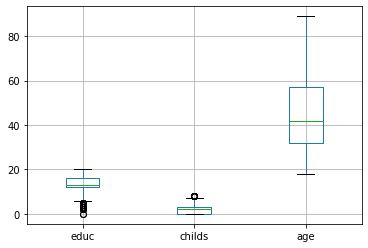

In [111]:
Conti_Vars.boxplot(column=['educ','childs','age'])

In [112]:
### educ var has outlier on lower side

Conti_Vars.educ=Conti_Vars.educ.clip(lower=Conti_Vars.educ.quantile(0.01))

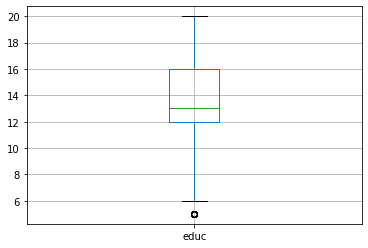

In [113]:
Conti_Vars.boxplot(column=['educ'])

In [114]:
Conti_Vars=Conti_Vars.apply(mvi)

In [115]:
Conti_Vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 4 columns):
id        2832 non-null int64
childs    2832 non-null float64
age       2832 non-null float64
educ      2832 non-null float64
dtypes: float64(3), int64(1)
memory usage: 88.6 KB


#### a. Is there any relationship in between labour force status with marital status?

In [116]:
## Null Hypothesis(Ho):There is NO relationship in between labour force status with marital status.
## Alternate Hypothesis(Ha):There is relationship in between labour force status with marital status.
## Confidence Interval:95%
## Decision Boundary:p<0.05 will be rejected.
## Test:Chi-Sq test
## Business Conclusion:we will reject NULL hypothesis as p value is low at 95% CI.
## (i.e.)there is relationship in between labour force status with marital status.

In [117]:
aa=pd.crosstab(Catog_Vars.wrkstat,Catog_Vars.marital)

In [118]:
stats.chi2_contingency(aa)

(729.7434446415614,
 1.1680926025178204e-135,
 28,
 array([[ 51.65536723, 156.00847458,  76.78813559,  10.77118644,
          32.77683616],
        [  8.50423729,  25.68432203,  12.64194915,   1.77330508,
           5.39618644],
        [ 62.04943503, 187.40042373,  92.23940678,  12.93855932,
          39.37217514],
        [ 12.44138418,  37.57521186,  18.49470339,   2.59427966,
           7.8944209 ],
        [  7.24435028,  21.87923729,  10.7690678 ,   1.51059322,
           4.59675141],
        [  9.13418079,  27.58686441,  13.57838983,   1.90466102,
           5.79590395],
        [247.09533898, 746.27224576, 367.31885593,  51.52436441,
         156.78919492],
        [ 47.87570621, 144.59322034,  71.16949153,   9.98305085,
          30.37853107]]))

In [119]:
##### as p value is low we will reject the null hypothesis i.e 2 vars are not independent

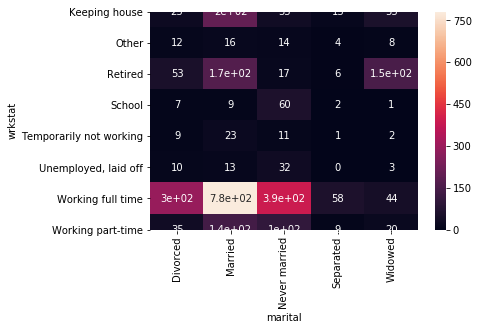

In [120]:
sns.heatmap(aa,annot=True)

#### b. Do you think educational qualification is somehow controlling the marital status? 

In [ ]:
## Null Hypothesis(Ho): Educational qualification is NOT controlling the marital status.
## Alternate Hypothesis(Ha):Educational qualification is controlling the marital status.
## Confidence Interval:95%
## Decision Boundary:p<0.05 will be rejected.
## Test:Chi-Sq
## Business Conclusion:we will reject NULL hypothesis as p value is low at 95% CI.
## (i.e.)Educational qualification IS controlling the marital status.

In [122]:
pd.crosstab(Catog_Vars.marital,Catog_Vars.degree)

degree,Bachelor,Graduate,High school,Junior college,LT High school
marital,,,,,
Divorced,58,29,244,45,70
Married,251,123,690,109,174
Never married,129,41,370,46,77
Separated,12,3,58,3,17
Widowed,28,9,148,6,92


In [123]:
stats.chi2_contingency(pd.crosstab(Catog_Vars.marital,Catog_Vars.degree))

(123.18796051189827,
 1.3360595578030385e-18,
 16,
 array([[ 75.27824859,  32.28460452, 237.80367232,  32.91454802,
          67.71892655],
        [227.35381356,  97.50529661, 718.20974576,  99.40783898,
         204.52330508],
        [111.90466102,  47.99258475, 353.50635593,  48.92902542,
         100.66737288],
        [ 15.6970339 ,   6.73199153,  49.58686441,   6.86334746,
          14.12076271],
        [ 47.76624294,  20.4855226 , 150.89336158,  20.88524011,
          42.96963277]]))

In [ ]:
## We can justify it by checking corelation between marital status and education

In [125]:
stats.spearmanr(Catog_Vars.marital,Conti_Vars.educ)

SpearmanrResult(correlation=-0.054509434375637024, pvalue=0.003711672859297306)

In [ ]:
##c. Is happiness is driven by earnings or marital status?

In [124]:
Catog_Vars

,wrkstat,marital,degree,sex,income,happy,agecat
0,Working full time,Divorced,High school,Male,$25000 or more,Pretty happy,55 to 64
1,Working part-time,Never married,Junior college,Female,$15000 - 19999,Pretty happy,25 to 34
2,Working full time,Married,High school,Male,$25000 or more,Very happy,35 to 44
3,Working full time,Never married,High school,Male,$15000 - 19999,Very happy,Less than 25
4,Working full time,Never married,Bachelor,Female,$25000 or more,Pretty happy,35 to 44
...,...,...,...,...,...,...,...
2827,Working full time,Married,Junior college,Female,$20000 - 24999,Very happy,65 or older
2828,Working full time,Divorced,High school,Female,$15000 - 19999,Not too happy,35 to 44
2829,Retired,Married,LT High school,Male,$20000 - 24999,Pretty happy,65 or older
2830,Working full time,Never married,High school,Male,$25000 or more,Pretty happy,45 to 54


In [ ]:
## Null Hypothesis(Ho):Happiness is NOT driven by earnings or marital status.
## Alternate Hypothesis(Ha):Happiness is driven by earnings or marital status.
## Confidence Interval:95%
## Decision Boundary:p<0.05 will be rejected.
## Test:Chi-Sq
## Business Conclusion:we will reject NULL hypothesis as p value is low at 95% CI.
## (i.e.)Happiness is driven by both income and happiness

In [126]:
pd.crosstab(Catog_Vars.happy,Catog_Vars.marital)

marital,Divorced,Married,Never married,Separated,Widowed
happy,,,,,
Not too happy,72,71,108,30,59
Pretty happy,281,694,435,50,141
Very happy,93,582,120,13,83


In [127]:
stats.chi2_contingency(pd.crosstab(Catog_Vars.happy,Catog_Vars.marital))

(261.0091307378115,
 7.96772529634007e-52,
 8,
 array([[ 53.54519774, 161.71610169,  79.59745763,  11.16525424,
          33.9759887 ],
        [252.13488701, 761.49258475, 374.81038136,  52.57521186,
         159.98693503],
        [140.31991525, 423.79131356, 208.59216102,  29.2595339 ,
          89.03707627]]))

In [133]:
pd.crosstab(Catog_Vars.happy,Catog_Vars.income)

income,$1000 TO 2999,$10000 - 14999,$15000 - 19999,$20000 - 24999,$25000 or more,$3000 TO 3999,$4000 TO 4999,$5000 TO 5999,$6000 TO 6999,$7000 TO 7999,$8000 TO 9999,LT $1000
happy,,,,,,,,,,,,
Not too happy,7,39,33,40,151,9,9,6,14,12,9,11
Pretty happy,20,109,120,157,1074,11,13,18,13,21,31,14
Very happy,5,44,26,50,691,4,10,11,6,14,19,11


In [134]:
stats.chi2_contingency(pd.crosstab(Catog_Vars.happy,Catog_Vars.income))

(177.41659890776808,
 2.7900820621651447e-26,
 22,
 array([[   3.84180791,   23.05084746,   21.49011299,   29.6539548 ,
          230.02824859,    2.88135593,    3.84180791,    4.2019774 ,
            3.96186441,    5.64265537,    7.08333333,    4.3220339 ],
        [  18.09039548,  108.54237288,  101.19314972,  139.63524011,
         1083.16242938,   13.56779661,   18.09039548,   19.78637006,
           18.65572034,   26.57026836,   33.35416667,   20.35169492],
        [  10.06779661,   60.40677966,   56.31673729,   77.71080508,
          602.80932203,    7.55084746,   10.06779661,   11.01165254,
           10.38241525,   14.78707627,   18.5625    ,   11.32627119]]))

In [ ]:
#### Happiness is driven by both income and happiness